/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


Top principal component is  [ 0.03416912  0.03229816  0.02914334 ... -0.07307659 -0.07889677
 -0.07757993]


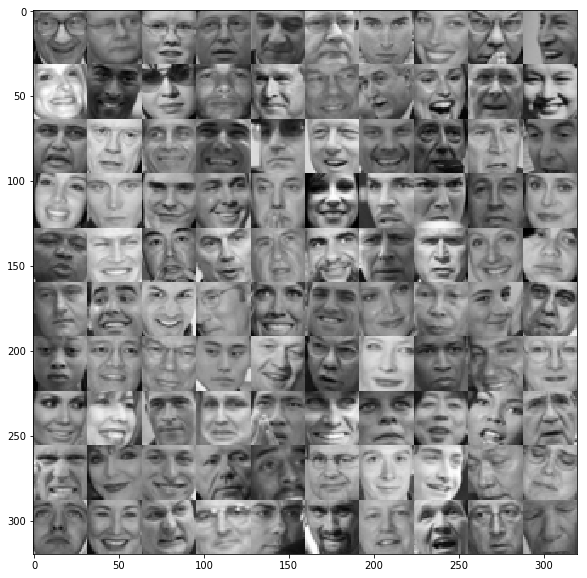

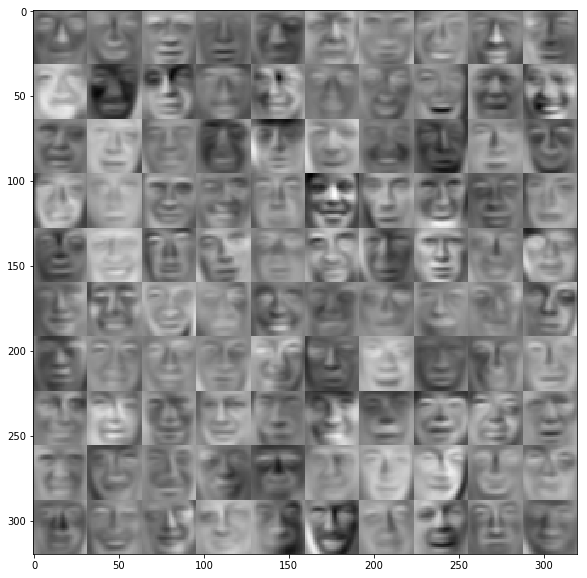

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.io
import scipy.misc
%matplotlib inline

from pca import feature_normalize, get_usv, project_data, recover_data


def get_datum_img(row):
    """
    Creates an image object from a single np array with shape 1x1024
    :param row: a single np array with shape 1x1024
    :return: the constructed image
    """
    return row.reshape((32, 32)).T


def display_data(samples, num_rows=10, num_columns=10, ax=None):
    """
    Function that picks the first 100 rows from X, creates an image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 32, 32
    num_rows, num_columns = num_rows, num_columns

    big_picture = np.zeros((height * num_rows, width * num_columns))

    row, column = 0, 0
    for index in range(num_rows * num_columns):
        if column == num_columns:
            row += 1
            column = 0
        img = get_datum_img(samples[index])
        big_picture[row * height:row * height + img.shape[0], column * width:column * width + img.shape[1]] = img
        column += 1
    plt.figure(figsize=(10, 10))
    ax = ax or plt.gca()
    img = scipy.misc.toimage(big_picture)
    ax.imshow(img, cmap=pylab.gray())


def main():
    datafile = 'data/faces.mat'
    mat = scipy.io.loadmat(datafile)
    samples = mat['X']
    display_data(samples)
    # Feature normalize
    samples_norm = feature_normalize(samples)

    # Run SVD
    U, S, v = get_usv(samples_norm)

    # Visualize the top 36 eigenvectors found
    print('Top principal component is ', U[:, 36])

    # Project each image down to 36 dimensions
    z = project_data(samples_norm, U, 36)

    # Attempt to recover the original data
#     recovered_samples = None
    recovered_samples = recover_data(z, U, 36)
    # Plot the dimension-reduced data
    display_data(recovered_samples)
    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
def main():
    datafile = 'data/faces.mat'
    mat = scipy.io.loadmat(datafile)
    samples = mat['X']
    display_data(samples)
    # Feature normalize
    samples_norm = feature_normalize(samples)

    # Run SVD
    U, S, v = get_usv(samples_norm)

    # Visualize the top 36 eigenvectors found
    print('Top principal component is ', U[:, 36])

    # Project each image down to 36 dimensions
    z = project_data(samples_norm, U, 36)

    # Attempt to recover the original data
#     recovered_samples = None
    recovered_samples = recover_data(z, U, 36)
    # Plot the dimension-reduced data
    display_data(recovered_samples)
    plt.show()


if __name__ == '__main__':
    main()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


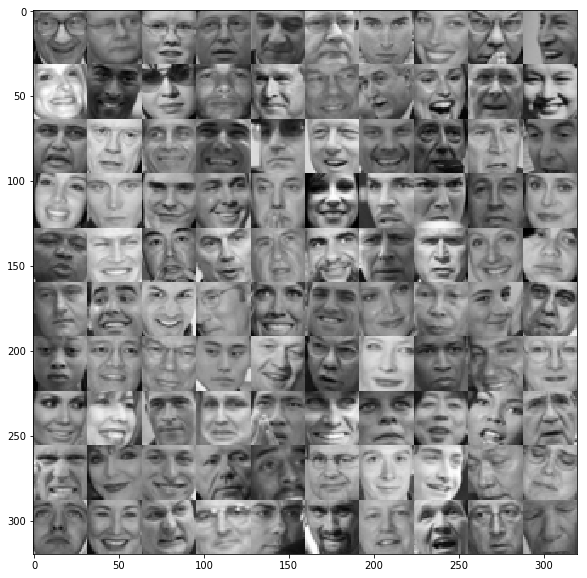

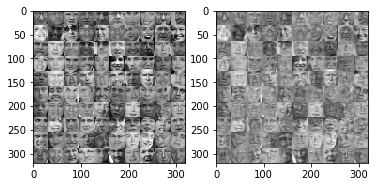

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [17]:
datafile = 'data/faces.mat'
mat = scipy.io.loadmat(datafile)
samples = mat['X']
display_data(samples)
# Feature normalize
samples_norm = feature_normalize(samples)

# Run SVD
U, S, v = get_usv(samples_norm)


# Project each image down to 36 dimensions
z = project_data(samples_norm, U, 100)

# Attempt to recover the original data

recovered_samples = recover_data(z, U, 100)
# Plot the dimension-reduced data

fig, _axs = plt.subplots(nrows=1, ncols=2)
axs = _axs.flatten()
display_data(samples, ax=axs[0])



display_data(recovered_samples, ax=axs[1])
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


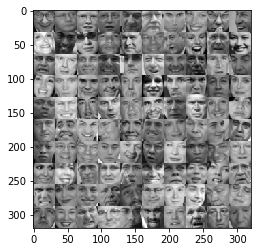

<Figure size 720x720 with 0 Axes>

Top principal component is  [ 0.03416912  0.03229816  0.02914334 ... -0.07307659 -0.07889677
 -0.07757993]


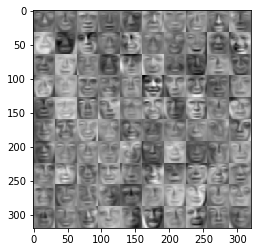

<Figure size 720x720 with 0 Axes>

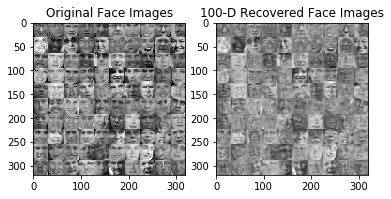

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.io
import scipy.misc

from pca import feature_normalize, get_usv, project_data, recover_data


def get_datum_img(row):
    """
    Creates an image object from a single np array with shape 1x1024
    :param row: a single np array with shape 1x1024
    :return: the constructed image
    """
    return row.reshape((32, 32)).T


def display_data(samples, num_rows=10, num_columns=10, ax=None):
    """
    Function that picks the first 100 rows from X, creates an image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 32, 32
    num_rows, num_columns = num_rows, num_columns

    big_picture = np.zeros((height * num_rows, width * num_columns))

    row, column = 0, 0
    for index in range(num_rows * num_columns):
        if column == num_columns:
            row += 1
            column = 0
        img = get_datum_img(samples[index])
        big_picture[row * height:row * height + img.shape[0], column * width:column * width + img.shape[1]] = img
        column += 1
    ax = ax or plt.gca()
    plt.figure(figsize=(10, 10))
    img = scipy.misc.toimage(big_picture)
    ax.imshow(img, cmap=pylab.gray())


def main():
    datafile = 'data/faces.mat'
    mat = scipy.io.loadmat(datafile)
    samples = mat['X']
    
    display_data(samples)
    plt.show()
    # Feature normalize
    samples_norm = feature_normalize(samples)

    # Run SVD
    U, S, v = get_usv(samples_norm)

    # Visualize the top 36 eigenvectors found
    print('Top principal component is ', U[:, 36])

    # Project each image down to 36 dimensions
    z = project_data(samples_norm, U, 36)

    # Attempt to recover the original data
    recovered_samples = recover_data(z, U, 36)
    # Plot the dimension-reduced data
    display_data(recovered_samples)
    plt.show()

    # Project each image down to 100 dimensions
    z = project_data(samples_norm, U, 100)

    # Attempt to recover the original data

    recovered_samples = recover_data(z, U, 100)
    # Plot the dimension-reduced data

    fig, _axs = plt.subplots(nrows=1, ncols=2)
    axs = _axs.flatten()
    display_data(samples, ax=axs[0])
    axs[0].set_title("Original Face Images")

    display_data(recovered_samples, ax=axs[1])
    axs[1].set_title("100-D Recovered Face Images")

    plt.show()



if __name__ == '__main__':
    main()


